<h1>Data analysis

In [14]:
import pandas as pd
data=pd.read_csv("train.csv")

In [15]:
data.head()

,ID,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
0,ID_1,-64,-56,-61,-66,-71,-82,-81,1
1,ID_2,-68,-57,-61,-65,-71,-85,-85,1
2,ID_3,-63,-60,-60,-67,-76,-85,-84,1
3,ID_4,-61,-60,-68,-62,-77,-90,-80,1
4,ID_5,-63,-65,-60,-63,-77,-81,-87,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
ID       1500 non-null object
wifi1    1500 non-null int64
wifi2    1500 non-null int64
wifi3    1500 non-null int64
wifi4    1500 non-null int64
wifi5    1500 non-null int64
wifi6    1500 non-null int64
wifi7    1500 non-null int64
room     1500 non-null int64
dtypes: int64(8), object(1)
memory usage: 105.5+ KB


<h3>We have ID is in object format, so they need to be converted to proper format

In [17]:
for i in range(0,1500):
    data['ID'][i]=data['ID'][i][3:]

/home/lokesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
data['ID']=data['ID'].astype(int)

Converted ID in proper format i.e. int64

In [20]:
data.describe()

,ID,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,-52.319333,-55.95800,-55.319333,-53.800667,-62.905333,-81.188000,-81.973333,2.500000
std,433.157015,11.672883,3.37834,5.132666,11.732435,9.127024,6.679002,6.676002,1.118407
min,1.000000,-74.000000,-74.00000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,375.750000,-61.000000,-58.00000,-58.250000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,750.500000,-55.000000,-56.00000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,1125.250000,-46.000000,-54.00000,-52.000000,-47.000000,-56.000000,-77.000000,-78.000000,3.250000
max,1500.000000,-10.000000,-46.00000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


In [21]:
data.tail()

,ID,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
1495,1496,-60,-55,-54,-58,-55,-86,-88,4
1496,1497,-63,-56,-52,-65,-47,-82,-92,4
1497,1498,-59,-57,-49,-66,-41,-87,-86,4
1498,1499,-62,-53,-55,-65,-49,-87,-87,4
1499,1500,-61,-58,-46,-69,-53,-82,-81,4


<h4>Data is not shuffled

In [26]:
data=data.sample(frac=1,replace=True).reset_index(drop='true')
data.tail(7)

,ID,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
1493,289,-60,-56,-62,-61,-69,-82,-81,1
1494,959,-52,-57,-58,-57,-68,-86,-83,3
1495,819,-50,-58,-54,-51,-60,-80,-82,3
1496,1237,-60,-61,-58,-63,-49,-84,-85,4
1497,83,-62,-57,-60,-65,-72,-83,-87,1
1498,1376,-64,-57,-54,-69,-43,-88,-92,4
1499,499,-41,-59,-65,-47,-75,-68,-66,2


<h4>shuffled by Pandas sample()

In [27]:
data.nunique()

ID       701
wifi1     51
wifi2     21
wifi3     29
wifi4     53
wifi5     45
wifi6     33
wifi7     33
room       4
dtype: int64

<h1>Features analysis

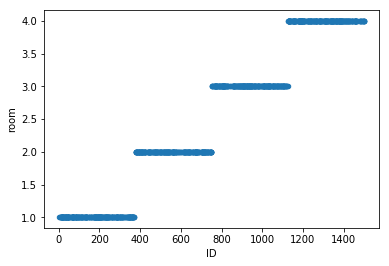

In [28]:
%matplotlib inline
data.plot(kind='scatter',x='ID',y='room')

<h3>This scatter plot shows high dependency on room by ID but this is misguiding us as data is given in specific order, so this feature must be removed

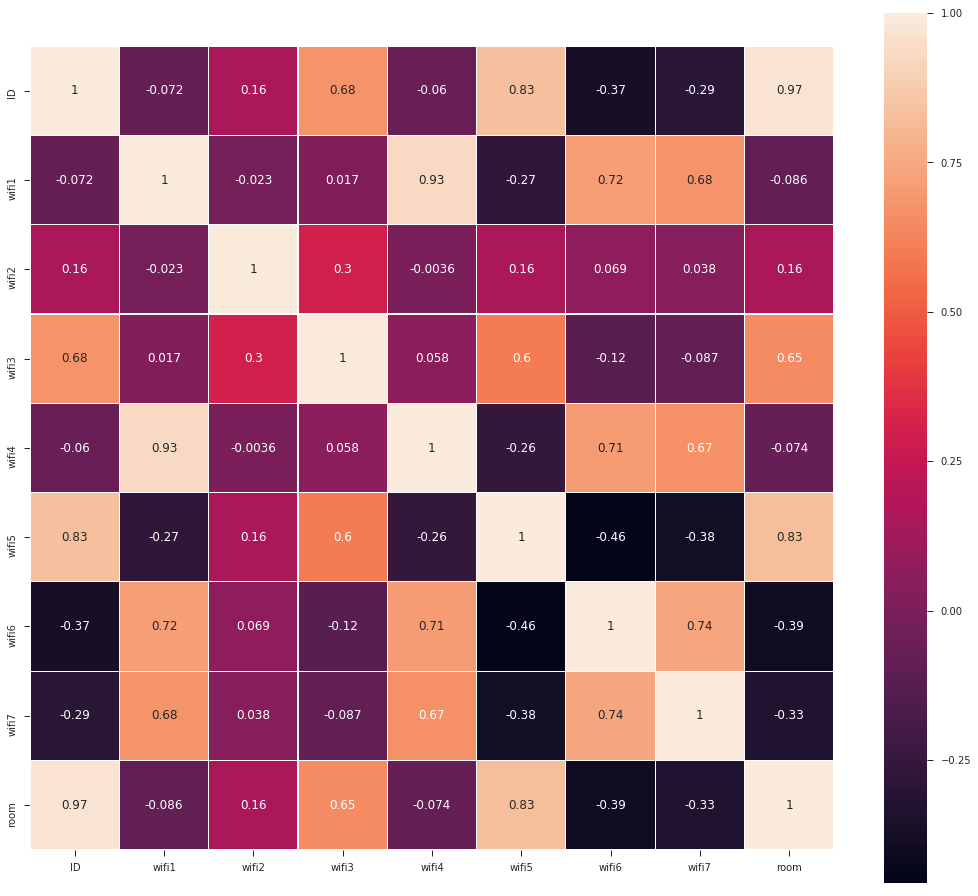

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks',color_codes=True)
plt.figure(figsize=(18,16))
sns.heatmap(data.astype(float).corr(),linewidths=0.1,square=True,linecolor='white',annot=True)
plt.show()

heatmap also shows 0.97 correlation of ID with room, so must be removed

In [32]:
data.drop('ID',axis=1,inplace=True)

In [33]:
data.head(7)

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
0,-50,-57,-50,-59,-62,-91,-93,3
1,-63,-58,-57,-61,-52,-89,-93,4
2,-57,-57,-51,-60,-53,-85,-89,4
3,-60,-52,-45,-58,-51,-87,-80,4
4,-64,-58,-59,-61,-70,-84,-86,1
5,-64,-52,-63,-62,-71,-84,-79,1
6,-59,-52,-59,-61,-54,-87,-89,4


<h4>Plotting histograms for showing effect of wifi on different rooms

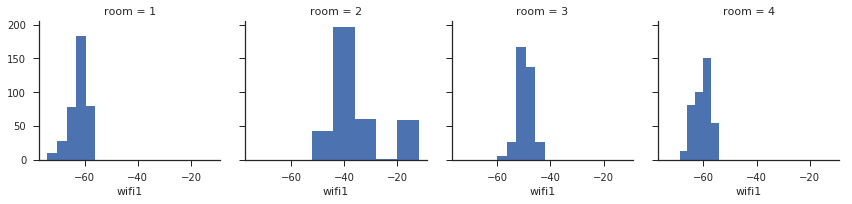

In [34]:
g = sns.FacetGrid(data, col='room')
g.map(plt.hist, 'wifi1', bins=5)

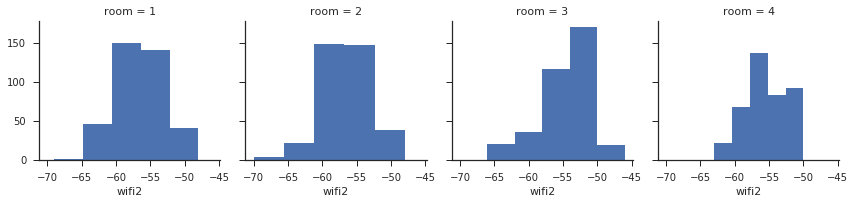

In [35]:
g = sns.FacetGrid(data, col='room')
g.map(plt.hist, 'wifi2', bins=5)

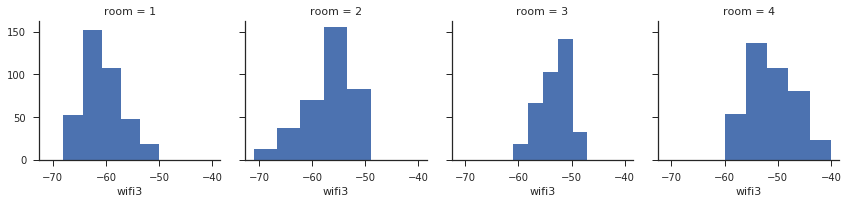

In [36]:
g = sns.FacetGrid(data, col='room')
g.map(plt.hist, 'wifi3', bins=5)

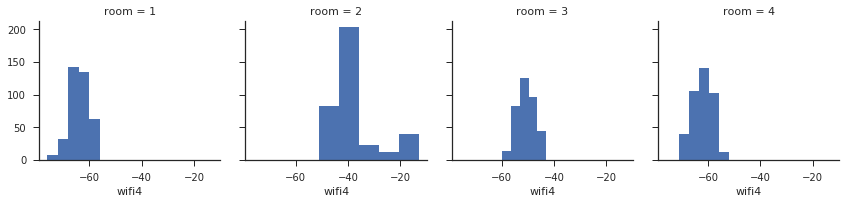

In [37]:
g = sns.FacetGrid(data, col='room')
g.map(plt.hist, 'wifi4', bins=5)

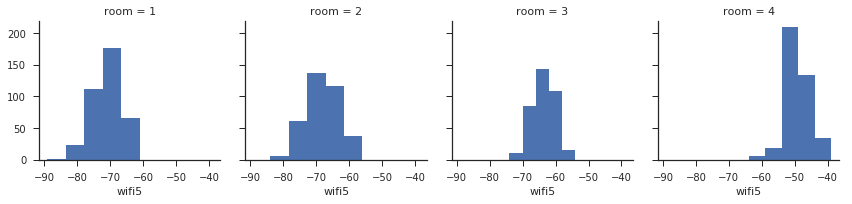

In [38]:
g = sns.FacetGrid(data, col='room')
g.map(plt.hist, 'wifi5', bins=5)

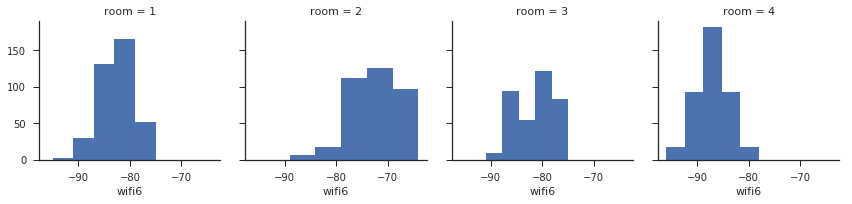

In [39]:
g = sns.FacetGrid(data, col='room')
g.map(plt.hist, 'wifi6', bins=5)

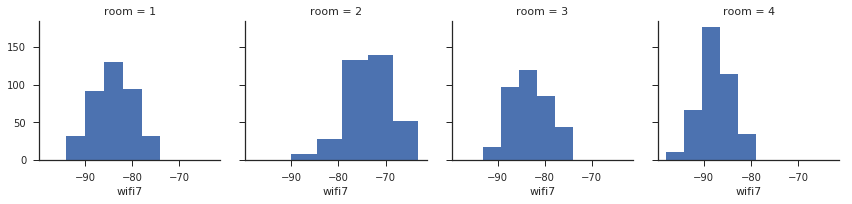

In [40]:
g = sns.FacetGrid(data, col='room')
g.map(plt.hist, 'wifi7', bins=5)

These plots shows that all features are equally important and it is also verified by heatmap

<h4>Now our data is ready to be used